# Classifying Dogs and Cats

### 1 . Preprocessing the data

In [4]:
import cv2 
import numpy as np 
import os 
from random import shuffle 
from tqdm import tqdm

# cv2 - for resizing image
# numpy - for arrays and loading .npy file-states
# os - for handling directories
# random - for shuffling images before training the CNN
# tqdm - for stylish looping of the progress bar

In [28]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'
IMG_SIZE = 50
LR = 1e-3                                          # 2conv-basic 
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '6conv-basic')

# IMG_SIZE refers to dimensions for resizing any image to 50 x 50
# Learning rate (LR) = 0.001

In [12]:
def label_img(img):
    
    """
    Used to split the name of the picture from 'cat.113.jpg' and returns 'cat'*
    from the training data.
    
    * -  in one_shot notation 
    
    [1, 0] means cat - true, dog - false
    [0, 1] means cat - false, dog - true
    """
    
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1, 0]
    elif word_label == 'dog' : return [0, 1]

In [9]:
def create_train_data():
    
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('training_data.npy', training_data)
    return training_data        

In [10]:
def process_test_data():
    
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
    
    np.save('test_data.npy', testing_data)
    return testing_data
        

In [13]:
train_data = create_train_data()
# if we already have the trained data
# train_data = np.load('train_data.npy')

100%|███████████████████████████████████| 25000/25000 [03:31<00:00, 118.19it/s]


### 2. Training the ConvNet

In [20]:
# 2-ConvNet

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir = 'log')

In [21]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [22]:
train = train_data[:-500]
test = train_data[-500:]

# similar to train_test_split from sklearn, for testing accuracy.
# train - has the first, 24500 images
# test - has the last 500 images, acts as out-of-sample data.

In [23]:
# this is for fitting the data into the model

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train])

# this is for testing the model
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = np.array([i[1] for i in test])

# X - feature set, pixel data
# Y - labels

In [24]:
model.fit({'input': X}, {'targets': Y}, n_epoch = 5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step = 500, show_metric = True, run_id=MODEL_NAME)

Training Step: 1914  | total loss: 11.55511 | time: 183.459s
| Adam | epoch: 005 | loss: 11.55511 - acc: 0.4982 -- iter: 24448/24500
Training Step: 1915  | total loss: 11.83872 | time: 184.984s
| Adam | epoch: 005 | loss: 11.83872 - acc: 0.4859 | val_loss: 10.54584 - val_acc: 0.5420 -- iter: 24500/24500
--


In [ ]:
# tensorboard --logdir=foo:C:\Me\Files\Projects\ML\CNN\log

In [29]:
# 6-ConvNet

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir = 'log')

In [30]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [31]:
train = train_data[:-500]
test = train_data[-500:]

# similar to train_test_split from sklearn, for testing accuracy.
# train - has the first, 24500 images
# test - has the last 500 images, acts as out-of-sample data.

In [32]:
# this is for fitting the data into the model

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train])

# this is for testing the model
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = np.array([i[1] for i in test])

# X - feature set, pixel data
# Y - labels

In [33]:
model.fit({'input': X}, {'targets': Y}, n_epoch = 5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step = 500, show_metric = True, run_id=MODEL_NAME)

Training Step: 1914  | total loss: 0.42268 | time: 125.719s
| Adam | epoch: 005 | loss: 0.42268 - acc: 0.8144 -- iter: 24448/24500
Training Step: 1915  | total loss: 0.41518 | time: 127.043s
| Adam | epoch: 005 | loss: 0.41518 - acc: 0.8142 | val_loss: 0.55758 - val_acc: 0.7560 -- iter: 24500/24500
--


In [ ]:
# 6-ConvNet at the end of 15 epochs

model.fit({'input': X}, {'targets': Y}, n_epoch = 10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step = 500, show_metric = True, run_id=MODEL_NAME)

Training Step: 5744  | total loss: 0.24353 | time: 129.023s
| Adam | epoch: 015 | loss: 0.24353 - acc: 0.9016 -- iter: 24448/24500
Training Step: 5745  | total loss: 0.25285 | time: 130.341s
| Adam | epoch: 015 | loss: 0.25285 - acc: 0.8958 | val_loss: 0.50554 - val_acc: 0.8220 -- iter: 24500/24500
--


In [ ]:
# 6-ConvNet at the end of 50 (15 + 35) epochs

model.fit({'input': X}, {'targets': Y}, n_epoch = 35, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step = 500, show_metric = True, run_id=MODEL_NAME)

Training Step: 18828  | total loss: 0.08497 | time: 18.817s
| Adam | epoch: 050 | loss: 0.08497 - acc: 0.9715 -- iter: 03904/24500


100%|████████████████████████████████████| 12500/12500 [02:51<00:00, 73.06it/s]


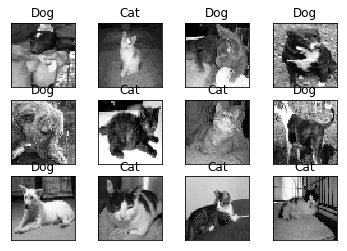

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# if you don't have the file 
# test_data = process_test_data()
# if you already have it
test_data = np.load('test_data.npy')

fig = plt.figure()

for num, data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_data = data[0]
    img_num = data[1]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0] # requires the model to be in memory
    
    if np.argmax(model_out) == 1: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)